## **Random Forest**

- Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their outputs for more robust and accurate predictions. By constructing a "forest" of trees, each trained on a random subset of features and data samples, Random Forest reduces the risk of overfitting and improves generalization compared to single decision trees. Each tree votes, and the class with the most votes is chosen (for classification), or the average is taken (for regression), making Random Forest highly effective in handling complex data patterns and reducing variance.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

**Data**

In [2]:
# Path 
file_path = 'data.csv'

# read the data
data = pd.read_csv(file_path)
if 'Unnamed: 0' in data.columns: 
    data.drop('Unnamed: 0', axis=1, inplace=True)

**Model**

In [3]:
# Separate the features and the target variable
X = data.iloc[:, :-1]  # last column is the target
y = data.iloc[:, -1]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Shapes 
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (39617, 9)
X_test shape: (9905, 9)
y_train shape: (39617,)
y_test shape: (9905,)


In [6]:
# Define the Random Forest model with custom hyperparameters
model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    criterion='gini',      # Use 'entropy' for information gain
    max_depth=None,        # Maximum depth of the tree
    min_samples_split=2,   # Minimum number of samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
    random_state=42,       # Random state for reproducibility
    n_jobs=-1              # Use all available cores
)

In [7]:
# Measure the training time
start_time = time.time()

print("Starting training...")

# Train the model
model.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

Starting training...


Training completed in 7.09 seconds


In [8]:
# predictions
ypred = model.predict(X_test)
print("Predictions: ", ypred)

Predictions:  [ 3.  1. 11. ...  7.  3.  1.]


In [9]:
# Evaluation 
print("Accuracy: ", accuracy_score(y_test, ypred))

Accuracy:  0.9393235739525492


In [10]:
class_report = classification_report(y_test, ypred)
print("Classification Report:", class_report)

Classification Report:               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2042
         1.0       0.86      0.94      0.90      1547
         2.0       0.98      0.95      0.97      1010
         3.0       0.88      0.85      0.87       376
         4.0       0.88      0.83      0.85       421
         5.0       0.95      0.96      0.95       303
         6.0       0.96      0.97      0.96       563
         7.0       0.92      0.90      0.91       402
         8.0       0.86      0.88      0.87       780
         9.0       0.91      0.94      0.92       263
        10.0       0.93      0.92      0.92       368
        11.0       0.99      0.98      0.99      1830

    accuracy                           0.94      9905
   macro avg       0.93      0.92      0.92      9905
weighted avg       0.94      0.94      0.94      9905



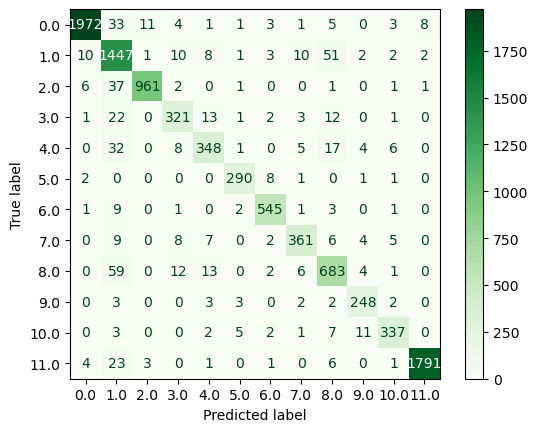

In [11]:
conf_matrix = confusion_matrix(y_test, ypred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

**Save the model**

In [12]:
# Save the model 
import joblib
import os

# Replace with the path to your desired folder
folder_path = "saved_models"
model_filename = "random_forest_model.pkl"
full_path = os.path.join(folder_path, model_filename)

# Ensure the directory exists
os.makedirs(folder_path, exist_ok=True)

# Save the trained SVM model
joblib.dump(model, full_path)

print(f"Model saved at {full_path}")

Model saved at saved_models\random_forest_model.pkl
